# 안녕하세요^^ 
# AIVLE 미니 프로젝트에 오신 여러분을 환영합니다.
* 본 과정에서는 실제 사례와 데이터를 기반으로 문제를 해결하는 전체 과정을 자기 주도형 실습으로 진행해볼 예정입니다.
* 앞선 교육과정을 정리하는 마음과 지금까지 배운 내용을 바탕으로 문제 해결을 해볼게요!
* 미니 프로젝트를 통한 문제 해결 과정 'A에서 Z까지', 지금부터 시작합니다!

---

# (실습준비) 데이터 불러오기부터

* 17년도부터 21년도 까지의 데이터를 train set, 22년도의 6개월치 데이터를 test set 으로 설정합니다.

In [3]:
#from google.colab import drive
#drive.mount('/content/drive')

Mounted at /content/drive


In [238]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import numpy as np

# 학습 데이터 로딩

df_total = pd.read_csv('df_total.csv')



---

# 1. 데이터 전처리

#### [실습문제1] 열 추가 
* 기존 '기준일ID'열에서 날짜 데이터를 추출하여 새로운 열로 추가 합니다.
    - pd.to_datetime() 함수를 사용해 '기준일ID'열을 datetime 형식으로 변경하겠습니다.
    - year, month, day 열로 기존 데이터 프레임에 연월일 정보를 저장합니다.
    - 데이터 프레임 열에 대해 날짜 정보를 얻을 때에는 **dt.year**, **dt.month**, **dt.day** 속성을 사용합니다. 

In [239]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.

df_total['기준일ID'] = pd.to_datetime(df_total['기준일ID'])

df_total['year'] = df_total['기준일ID'].dt.year
df_total['month'] = df_total['기준일ID'].dt.month
df_total['day'] = df_total['기준일ID'].dt.day

df_total


,기준일ID,시간대구분,총생활인구수,남자0세부터9세생활인구수,남자10세부터14세생활인구수,남자15세부터19세생활인구수,남자20세부터24세생활인구수,남자25세부터29세생활인구수,남자30세부터34세생활인구수,남자35세부터39세생활인구수,...,여자40세부터44세생활인구수,여자45세부터49세생활인구수,여자50세부터54세생활인구수,여자55세부터59세생활인구수,여자60세부터64세생활인구수,여자65세부터69세생활인구수,여자70세이상생활인구수,year,month,day
0,2017-01-01,0,43922.2281,953.7652,627.7225,927.6134,2025.0630,2278.7336,1744.8161,1713.6754,...,1754.6515,1636.4175,1521.3668,1728.0639,1484.4518,1238.2606,3670.0451,2017,1,1
1,2017-01-01,1,43763.4929,962.2909,633.3292,970.6215,2045.7002,2412.6287,1765.7725,1765.1171,...,1700.9196,1619.3672,1474.8418,1661.3750,1470.3009,1098.4788,3568.8258,2017,1,1
2,2017-01-01,2,43561.5708,932.2939,613.6027,964.3505,2057.3601,2419.0941,1734.0569,1746.3940,...,1660.6697,1660.9852,1511.4103,1635.0352,1441.0173,1112.3632,3541.2620,2017,1,1
3,2017-01-01,3,43928.9929,926.3617,609.7009,983.2400,2100.5071,2480.1898,1780.3833,1723.6640,...,1678.9374,1626.8350,1516.5837,1665.8781,1471.2127,1098.3154,3630.0822,2017,1,1
4,2017-01-01,4,44150.2973,922.8893,607.4184,990.0534,2128.2729,2531.6549,1774.7853,1752.0073,...,1678.6174,1640.9056,1513.5035,1653.2704,1435.5180,1090.4059,3569.1653,2017,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43507,2021-12-31,19,33304.5400,569.3452,374.9229,702.9942,1195.0912,1818.2627,1434.7351,1439.8129,...,1136.8778,1399.4513,1262.9415,1342.7762,1058.0542,749.3935,2239.1210,2021,12,31
43508,2021-12-31,20,33368.7201,599.9827,395.0698,806.5718,1232.5401,1781.4567,1441.6411,1469.7313,...,1124.4243,1414.3330,1224.8609,1336.5298,1056.6818,756.4905,2226.3545,2021,12,31
43509,2021-12-31,21,34083.1721,630.5049,415.1424,825.4794,1360.3197,1866.0852,1428.3237,1490.6164,...,1174.9639,1477.2012,1250.2445,1336.1856,1042.3110,750.1392,2249.0323,2021,12,31
43510,2021-12-31,22,34380.0806,618.6265,407.3311,831.6651,1364.7723,1899.4216,1416.2191,1473.4710,...,1171.6865,1488.2721,1269.3231,1334.5079,1045.8411,762.5466,2263.6665,2021,12,31


#### [실습문제2] 불필요한 열 제거 및 열 이름 변경
* df_total과 df_test에서 '총생활인구수'외에 불필요한 열을 제거 하도록 하겠습니다.
* 시간 데이터를 남기고, '시간대구분' column 을 'hour'로 rename 하도록 하겠습니다. 

In [240]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.

df_total = df_total[['year','month','day','시간대구분','총생활인구수']]
df_total.rename(columns={'시간대구분':'hour'},inplace=True)

C:\Users\PC\AppData\Local\Temp\ipykernel_18184\615169809.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_total.rename(columns={'시간대구분':'hour'},inplace=True)


#### [실습문제3] 시프트 & 롤링
* shift()를 활용하여 이동할 행 수를 지정합니다.
* rolling()을 활용하여 추가할 이동평균 수를 지정합니다.

In [241]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.

df_total['7d'] = df_total['총생활인구수'].shift(24*7*56)

C:\Users\PC\AppData\Local\Temp\ipykernel_18184\2148467254.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_total['7d'] = df_total['총생활인구수'].shift(24*7*56)


In [242]:
pd.set_option('display.max_row', 500)
df_total
df_total[(df_total['year']==2019)&((df_total['month']==1)|(df_total['month']==2))].reset_index(drop=True)[700:1200]



,year,month,day,hour,총생활인구수,7d
700,2019,1,30,4,46581.8358,45394.6732
701,2019,1,30,5,46633.2237,45476.7039
702,2019,1,30,6,46275.1619,45458.3244
703,2019,1,30,7,46699.1077,44019.1833
704,2019,1,30,8,44419.2264,39911.6530
705,2019,1,30,9,42714.5086,38819.7868
706,2019,1,30,10,42389.7377,37600.1017
707,2019,1,30,11,41479.0270,36417.2042
708,2019,1,30,12,40539.3778,35892.9720
709,2019,1,30,13,39817.2458,35533.3007


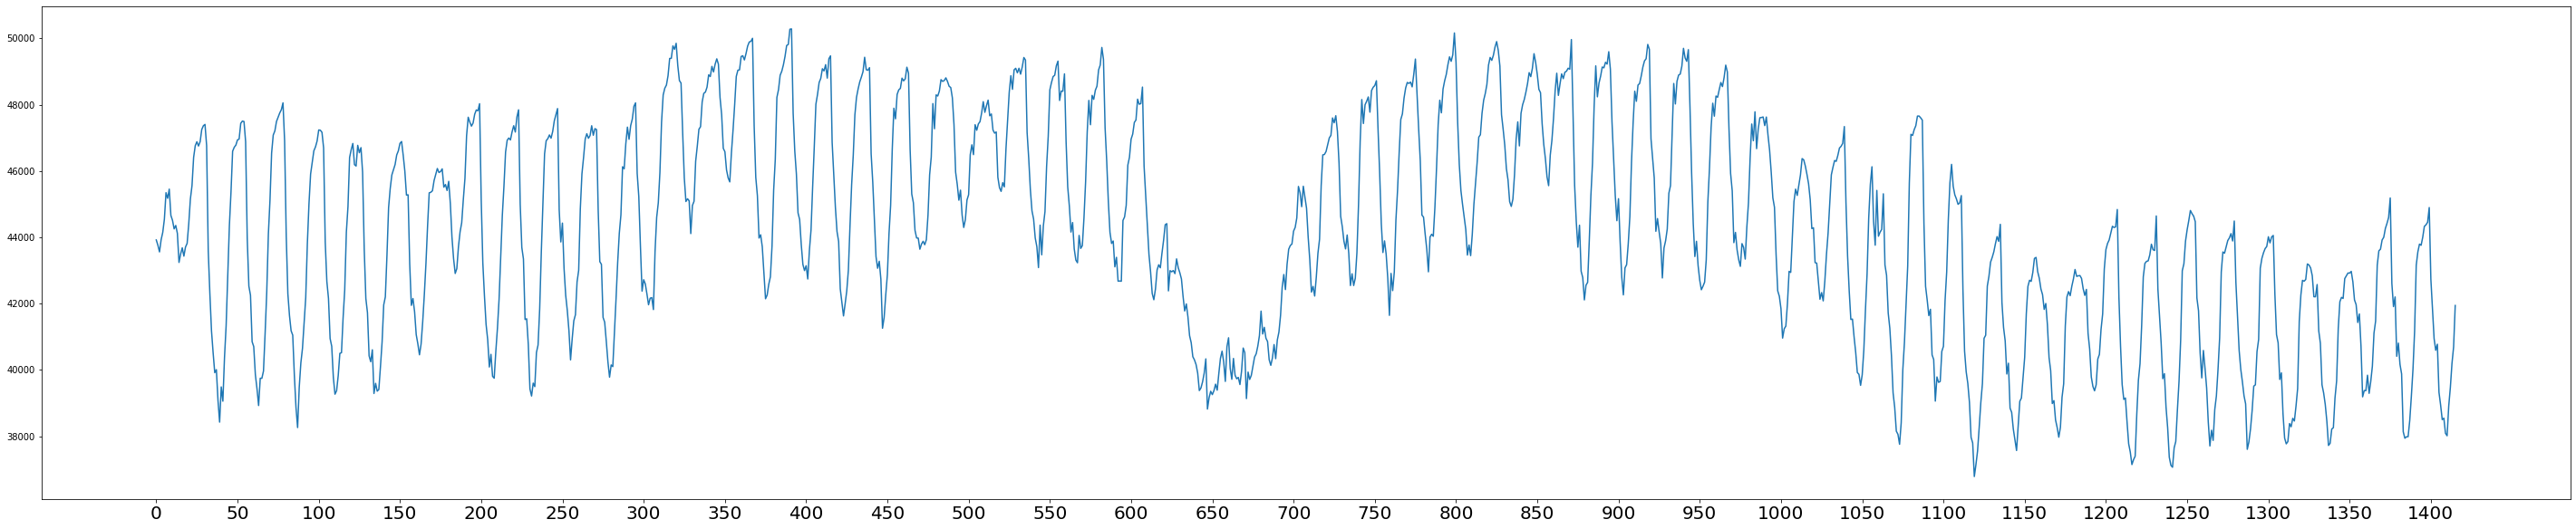

In [102]:
plt.figure(figsize=(50,10))
x=range(0,1416,50)
plt.rc('xtick', labelsize=20)
plt.plot(df_total[(df_total['year']==2017)&((df_total['month']==1)|(df_total['month']==2))]['총생활인구수'])
plt.xticks(x)



plt.show()

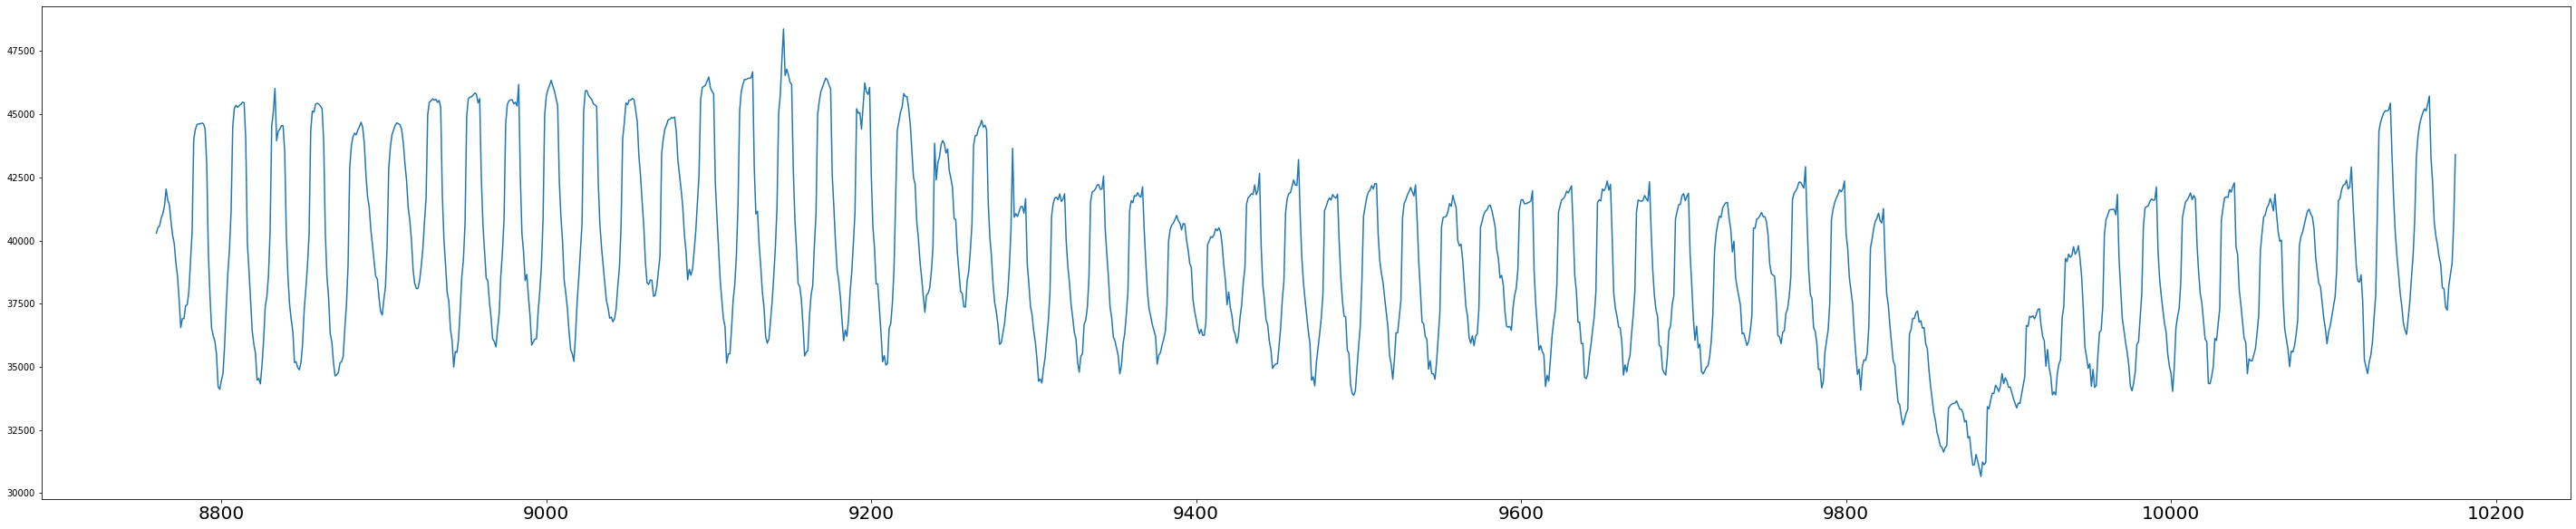

In [106]:
plt.figure(figsize=(50,10))

plt.rc('xtick', labelsize=20)
plt.plot(df_total[(df_total['year']==2018)&((df_total['month']==1)|(df_total['month']==2))]['총생활인구수'])


plt.show()

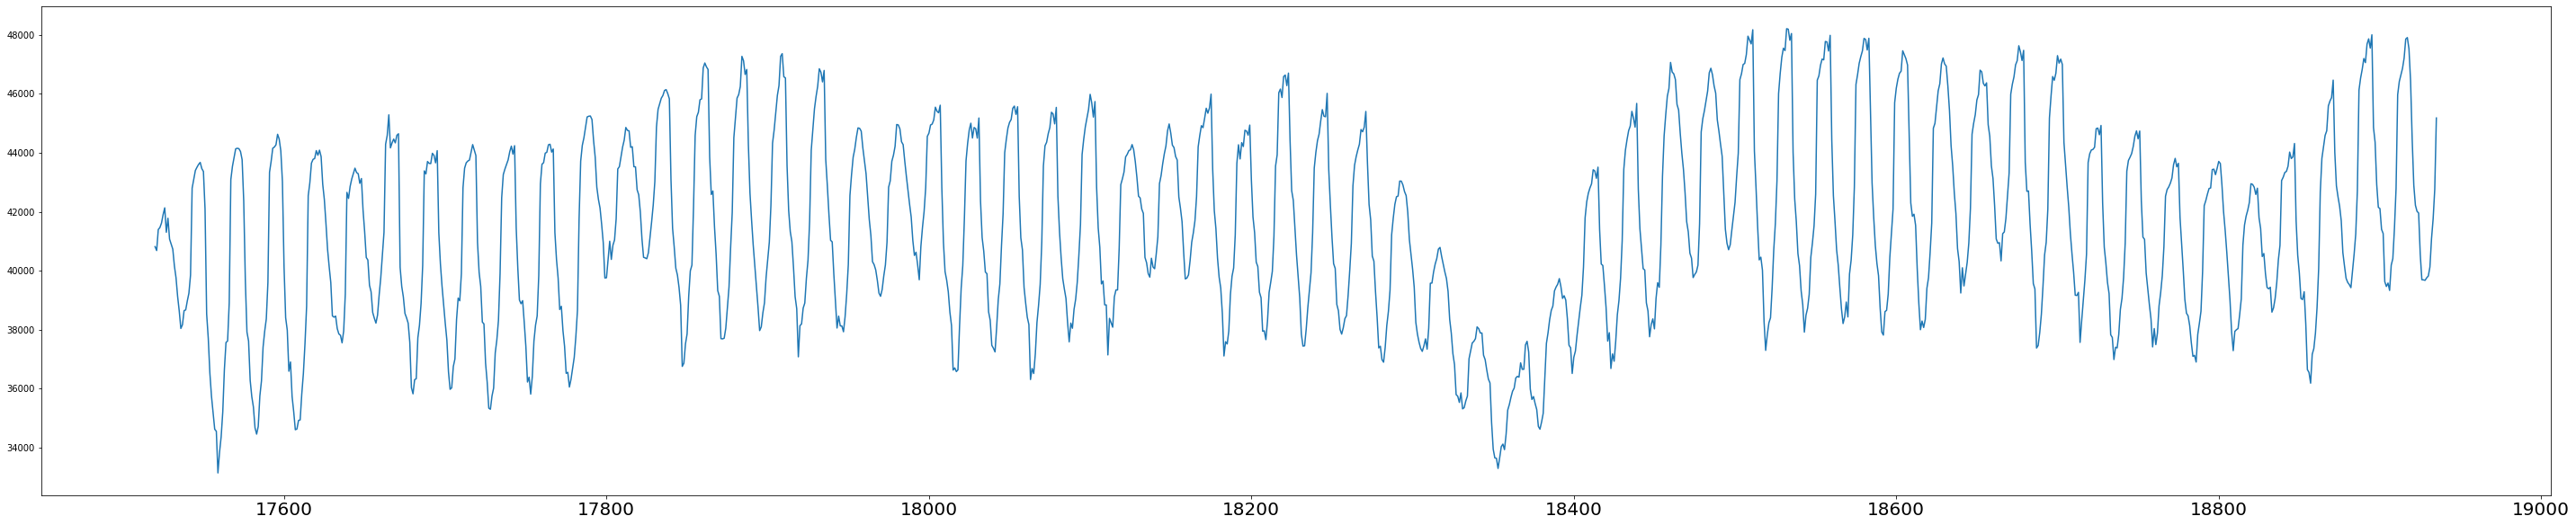

In [107]:
plt.figure(figsize=(50,10))

plt.rc('xtick', labelsize=20)
plt.plot(df_total[(df_total['year']==2019)&((df_total['month']==1)|(df_total['month']==2))]['총생활인구수'])


plt.show()

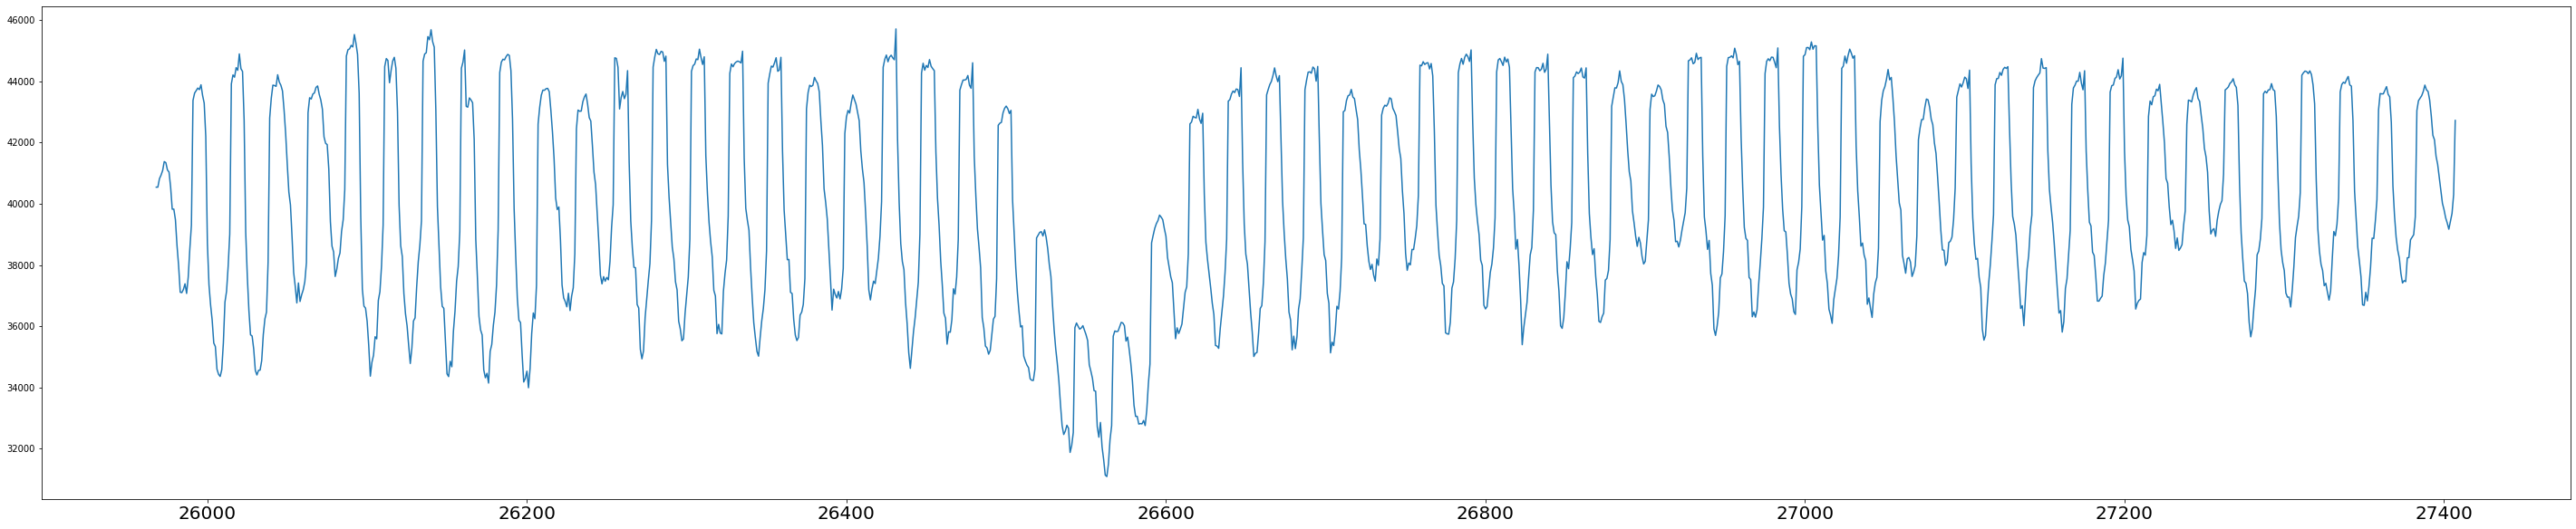

In [108]:
plt.figure(figsize=(50,10))

plt.rc('xtick', labelsize=20)
plt.plot(df_total[(df_total['year']==2020)&((df_total['month']==1)|(df_total['month']==2))]['총생활인구수'])


plt.show()

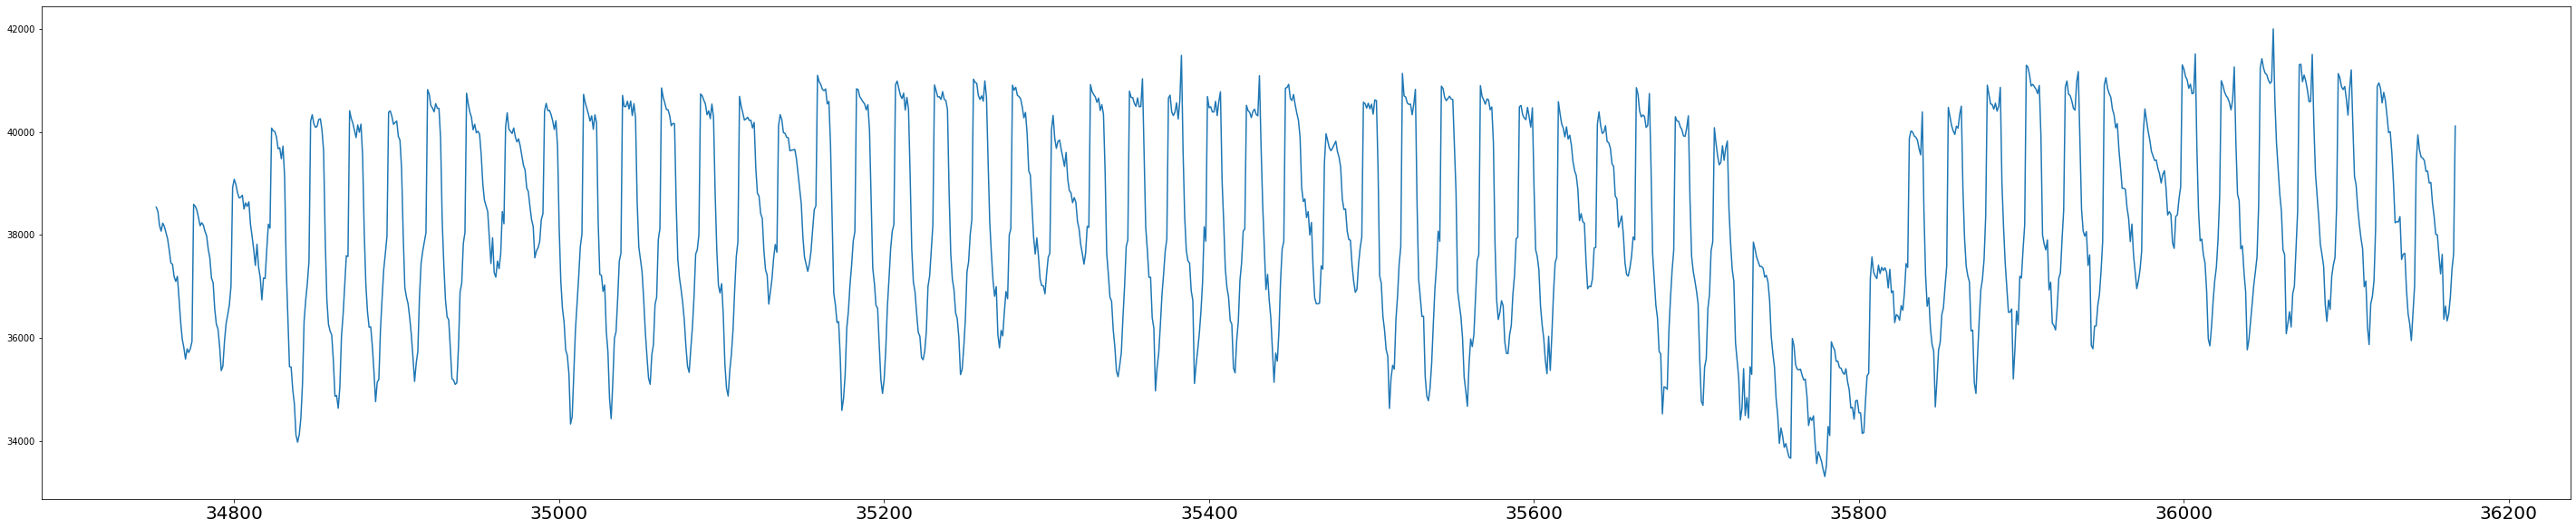

In [109]:
plt.figure(figsize=(50,10))

plt.rc('xtick', labelsize=20)
plt.plot(df_total[(df_total['year']==2021)&((df_total['month']==1)|(df_total['month']==2))]['총생활인구수'])


plt.show()

#### [실습문제4] 결측치 처리 및 불필요한 열 제거
* 롤링 & 시프트 과정에서 발생한 결측치를 처리하도록 하겠습니다.
* 불필요한 열을 추가로 제거 하겠습니다.(시간 관련 행들)

In [113]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.

df_total = df_total.drop(['year','month','day','hour'], axis=1)
df_total = df_total.dropna()

#### [실습문제5] train, test 데이터 나누기
* df_total과 df_test를 각각 train_x, train_y, test_x, test_y 로 나누어 주세요.
* 인덱스를 리셋 해주세요.

In [114]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.

train_x = df_total.iloc[ :,1:]
train_y = df_total.iloc[ :,:1]



train_x

,7d
9408,43922.2281
9409,43763.4929
9410,43561.5708
9411,43928.9929
9412,44150.2973
...,...
43507,36929.8686
43508,37185.4014
43509,38017.4658
43510,38546.8894


In [115]:
train_x

,7d
9408,43922.2281
9409,43763.4929
9410,43561.5708
9411,43928.9929
9412,44150.2973
...,...
43507,36929.8686
43508,37185.4014
43509,38017.4658
43510,38546.8894


---

## 다음 단계를 위해서 데이터를 저장하겠습니다.

In [116]:
# CSV로 저장
train_x.to_csv('train_x.csv', index = False)
train_y.to_csv('train_y.csv', index = False)


In [117]:
import pandas as pd

# 학습/평가 데이터 로딩
train_x = pd.read_csv("train_x.csv")
train_y = pd.read_csv("train_y.csv")


In [118]:
train_x

,7d
0,43922.2281
1,43763.4929
2,43561.5708
3,43928.9929
4,44150.2973
...,...
34099,36929.8686
34100,37185.4014
34101,38017.4658
34102,38546.8894


In [119]:
train_y

,총생활인구수
0,39981.4087
1,40149.9707
2,40121.6724
3,40232.5369
4,40467.8193
...,...
34099,33304.5400
34100,33368.7201
34101,34083.1721
34102,34380.0806


In [120]:
train_x = train_x.values
train_y = train_y.values


In [121]:
train_x

array([[43922.2281],
       [43763.4929],
       [43561.5708],
       ...,
       [38017.4658],
       [38546.8894],
       [41168.3668]])

In [122]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.rc('font', family='Malgun Gothic')
sns.set(font="Malgun Gothic",#"NanumGothicCoding", 
        rc={"axes.unicode_minus":False}, # 마이너스 부호 깨짐 현상 해결
        style='darkgrid')

In [123]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import r2_score as r2
from math import sqrt

LR_reg = LinearRegression()
LR_reg.fit(train_x, train_y)

LinearRegression()

In [219]:
y_pred_LR = LR_reg.predict(train_x[-1416:])

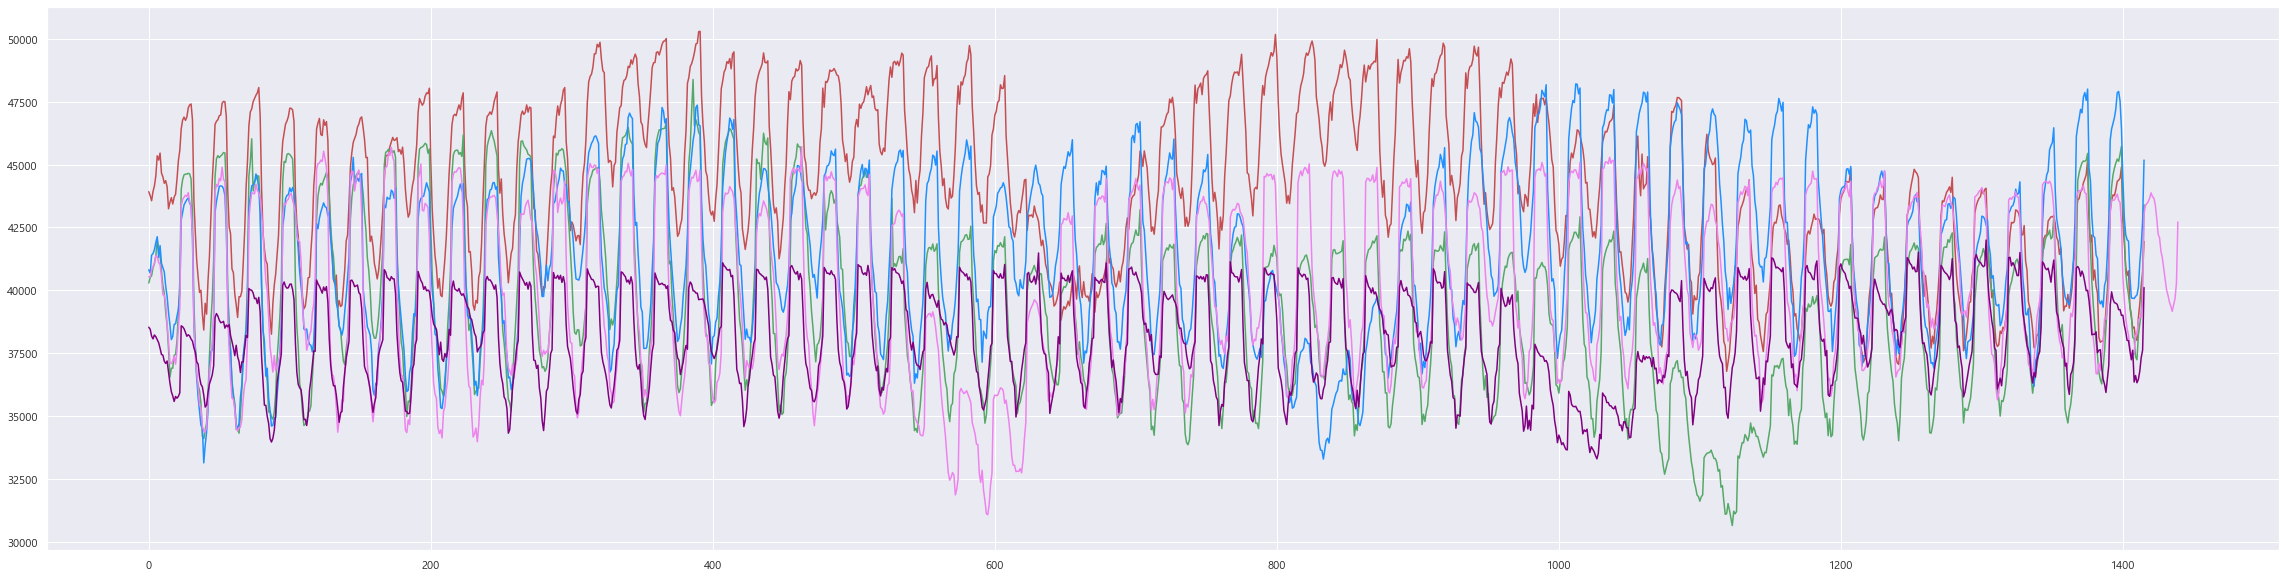

In [148]:
plt.figure(figsize=(40,10))


plt.plot(df_total[(df_total['year']==2017)&((df_total['month']==1)|(df_total['month']==2))]['총생활인구수'],'r')
plt.plot(a_2018,'g')
plt.plot(df_total[(df_total['year']==2019)&((df_total['month']==1)|(df_total['month']==2))]['총생활인구수'].reset_index(drop=True),color='dodgerblue')
plt.plot(df_total[(df_total['year']==2020)&((df_total['month']==1)|(df_total['month']==2))]['총생활인구수'].reset_index(drop=True),color='violet')
plt.plot(df_total[(df_total['year']==2021)&((df_total['month']==1)|(df_total['month']==2))]['총생활인구수'].reset_index(drop=True),color='purple')



plt.show()


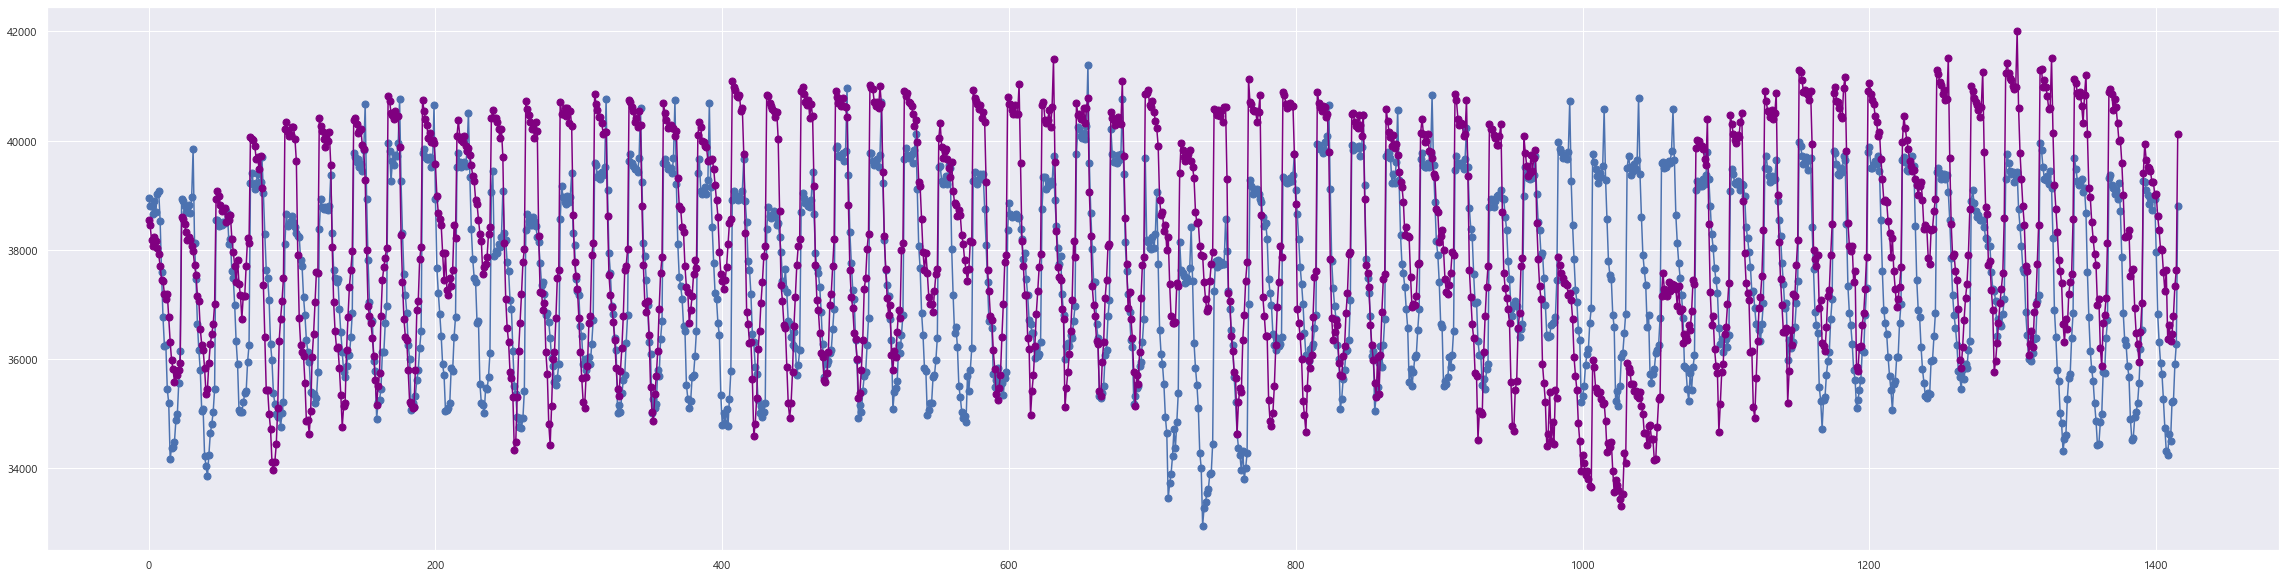

In [304]:
plt.figure(figsize=(40,10))


plt.plot(abc,marker = 'o', markersize = 7)
plt.plot(df_total[(df_total['year']==2021)&((df_total['month']==1)|(df_total['month']==2))]['총생활인구수'].reset_index(drop=True),color='purple',marker = 'o', markersize = 7)



plt.show()

In [303]:
y_pred_LR = LR_reg.predict(train_x[-1416:])
abc=pd.DataFrame(df_many['count'])

abc[0:48]=abc[0:48]-1000
abc.iloc[7]=abc.iloc[7]-1000
abc.iloc[55]=abc.iloc[55]-1000
abc[48:57]=abc[48:57]-1000

abc[24*29:24*30]=(abc[24*29:24*30])-1500
abc[24*30:24*31]=(abc[24*30:24*31])-2000
abc[24*31:24*32]=(abc[24*31:24*32])-1500


abc[:500]




,count
0,38942.798266
1,38811.141655
2,38799.653858
3,38665.198973
4,38886.998608
5,38698.332962
6,39024.904419
7,39077.655523
8,38535.887555
9,37586.107071


In [305]:

abc=abc.reset_index()
abc.columns = ['id', 'count']
abc

,id,count
0,0,38942.798266
1,1,38811.141655
2,2,38799.653858
3,3,38665.198973
4,4,38886.998608
...,...,...
1411,1411,35209.562881
1412,1412,35226.434944
1413,1413,35903.510862
1414,1414,36278.855354


In [262]:
df_many = pd.read_csv('many.csv')
df_many

,id,count
0,0,39942.798266
1,1,39811.141655
2,2,39799.653858
3,3,39665.198973
4,4,39886.998608
...,...,...
1411,1411,35209.562881
1412,1412,35226.434944
1413,1413,35903.510862
1414,1414,36278.855354


In [306]:
abc.to_csv('many2.csv', index = False)

In [159]:
pd.DataFrame(df_total[(df_total['year']==2021)&((df_total['month']==1)|(df_total['month']==2))]['총생활인구수'].reset_index(drop=True))

,총생활인구수
0,38538.5993
1,38457.1528
2,38185.1451
3,38074.2836
4,38229.0027
...,...
1411,36466.6586
1412,36795.4254
1413,37333.9824
1414,37630.8536


In [162]:
df_total[(df_total['year']==2021)&((df_total['month']==1)|(df_total['month']==2))].reset_index()[24*42:24*44+1]

,index,year,month,day,hour,총생활인구수,7d
1008,35760,2021,2,12,0,35850.1935,44239.8017
1009,35761,2021,2,12,1,35478.3545,44496.4223
1010,35762,2021,2,12,2,35394.1509,44463.9884
1011,35763,2021,2,12,3,35379.4976,44603.5149
1012,35764,2021,2,12,4,35394.0228,44769.7662
1013,35765,2021,2,12,5,35275.1606,44327.2592
1014,35766,2021,2,12,6,35182.2657,44366.8399
1015,35767,2021,2,12,7,35198.8248,44784.7993
1016,35768,2021,2,12,8,34864.7994,41712.7969
1017,35769,2021,2,12,9,34299.7681,39797.1818


---